# Imports

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn
import random
import itertools
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import r_regression
from sklearn.linear_model import LinearRegression
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from enum import Enum
from IPython.display import display_html
from itertools import chain,cycle
from aob_helpers import *

# set styles
sns.set_context("notebook", font_scale=1)
sns.set(style="white", font="Courier New") 
# from matplotlib.font_manager import get_font_names 
# print(get_font_names())  

# Load Datasets

In [18]:
# file paths
file_1 = r'data\all\dataStage1_varSet2.csv'
file_2 = r'data\all\dataStage2_varSet2.csv'
file_3 = r'data\all\dataStage3_varSet2.csv'
file_4 = r'data\all\dataStage4_varSet2.csv'

# load dataframes
df_1 = pd.read_csv(file_1, header=None)
df_2 = pd.read_csv(file_2, header=None)
df_3 = pd.read_csv(file_3, header=None)
df_4 = pd.read_csv(file_4, header=None)

# set parameter names
df_1 = df_1.rename(columns={0:"accMisalign", 1:"accScfacRep", 2:"accScfacSta", 3:"accBiasRep", 4:"accAss", 
                            5:"gyrMisalign", 6:"gyrScfacRep", 7:"gyrScfacSta", 8:"gyrBiasRep", 9:"gyrAss", 10:"metric"})
df_2 = df_2.rename(columns={0:"accMisalign", 1:"accScfacRep", 2:"accScfacSta", 3:"accBiasRep", 4:"accAss", 
                            5:"gyrMisalign", 6:"gyrScfacRep", 7:"gyrScfacSta", 8:"gyrBiasRep", 9:"gyrAss", 10:"metric"})
df_3 = df_3.rename(columns={0:"accMisalign", 1:"accScfacRep", 2:"accScfacSta", 3:"accBiasRep", 4:"accAss", 
                            5:"gyrMisalign", 6:"gyrScfacRep", 7:"gyrScfacSta", 8:"gyrBiasRep", 9:"gyrAss", 10:"metric"})
df_4 = df_4.rename(columns={0:"accMisalign", 1:"accScfacRep", 2:"accScfacSta", 3:"accBiasRep", 4:"accAss", 
                            5:"gyrMisalign", 6:"gyrScfacRep", 7:"gyrScfacSta", 8:"gyrBiasRep", 9:"gyrAss", 10:"metric"})
parameter_names = ["accMisalign", "accScfacRep", "accScfacSta", "accBiasRep", "accAss", "gyrMisalign", "gyrScfacRep", "gyrScfacSta", "gyrBiasRep", "gyrAss"]

In [19]:
display_side_by_side(df_1.head(10), df_2.head(10), df_3.head(10), df_4.head(10), titles=["1st Stage", "2nd Stage", "3rd Stage", "4th Stage"])

,accMisalign,accScfacRep,accScfacSta,accBiasRep,accAss,gyrMisalign,gyrScfacRep,gyrScfacSta,gyrBiasRep,gyrAss,metric
0,-0.527540,-0.95620,-0.789620,-0.82610,-0.737650,0.864890,0.24800,-0.152860,2.048700,-0.439050,-0.62991
1,-0.036688,-0.86744,0.204260,0.17013,-0.322720,-0.516760,0.63569,-0.463630,0.411740,0.984210,-0.32352
2,0.737850,-0.63804,-0.274390,1.75240,-0.124010,-0.393960,0.38597,-0.993780,1.390200,-0.511290,-0.29834
3,-0.762480,0.17849,-0.438650,2.17160,-0.303340,-0.989210,-0.64112,0.878380,-0.129130,0.792370,-0.11988
4,-0.398580,0.93725,0.737200,0.65782,-0.711700,-0.549000,0.21838,0.472380,2.195500,0.088211,0.61047
5,0.637870,-0.69828,-0.354260,1.30080,-0.020907,-0.450460,-0.18142,0.032783,-1.885600,0.469950,-0.32406
6,0.317090,0.96628,-0.888360,1.68230,-0.368020,-0.454020,-0.16591,-0.523620,0.494260,0.233600,0.24258
7,-0.335590,0.55430,-0.941510,-0.66312,-0.444990,0.236230,0.63098,0.460980,0.618460,-0.830810,0.37897
8,0.873780,-0.42227,0.047828,2.57090,-0.612870,-0.063737,0.14944,-0.946650,-0.093613,0.349390,-0.23641
9,0.147070,-0.93051,-0.442270,2.06400,0.056091,-0.144470,0.51389,-0.633000,-2.260400,0.658170,-0.44759


# Correlations

### 1st Stage

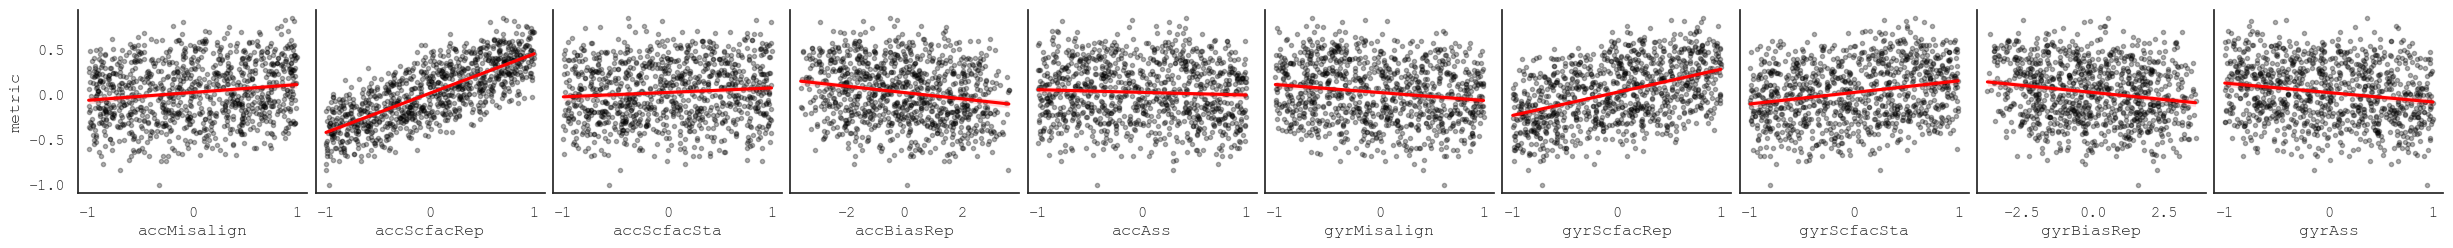

In [27]:
sns.pairplot(data=df_1, x_vars=parameter_names, y_vars=["metric"], markers=".", diag_kind="kde", kind='reg',
             plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.3, 'color': 'black'}})

In [28]:
for p in parameter_names:
    correlate_variables(df_1, p, 'metric', 0.3)

Correlation between accScfacRep and metric is : 0.751
Correlation between gyrScfacRep and metric is : 0.44


### 2nd Stage

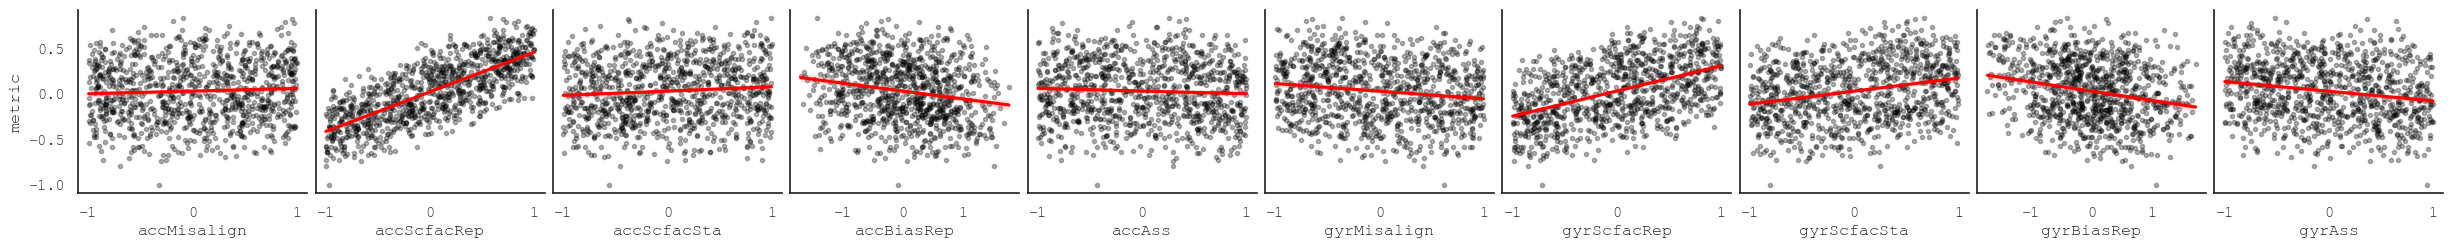

In [29]:
sns.pairplot(data=df_2, x_vars=parameter_names, y_vars=["metric"], markers=".", diag_kind="kde", kind='reg',
             plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.3, 'color': 'black'}})

In [30]:
for p in parameter_names:
    correlate_variables(df_2, p, 'metric', 0.3)

Correlation between accScfacRep and metric is : 0.748
Correlation between gyrScfacRep and metric is : 0.474


### 3rd Stage

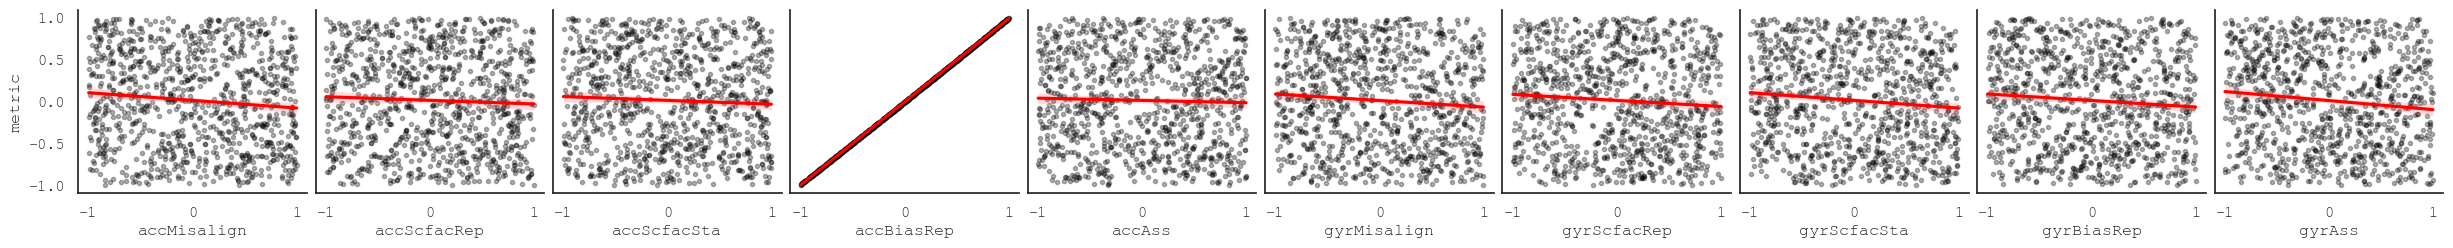

In [31]:
sns.pairplot(data=df_3, x_vars=parameter_names, y_vars=["metric"], markers=".", diag_kind="kde", kind='reg',
             plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.3, 'color': 'black'}})

In [32]:
for p in parameter_names:
    correlate_variables(df_3, p, 'metric', 0.3)

Correlation between accBiasRep and metric is : 1.0


### 4th Stage

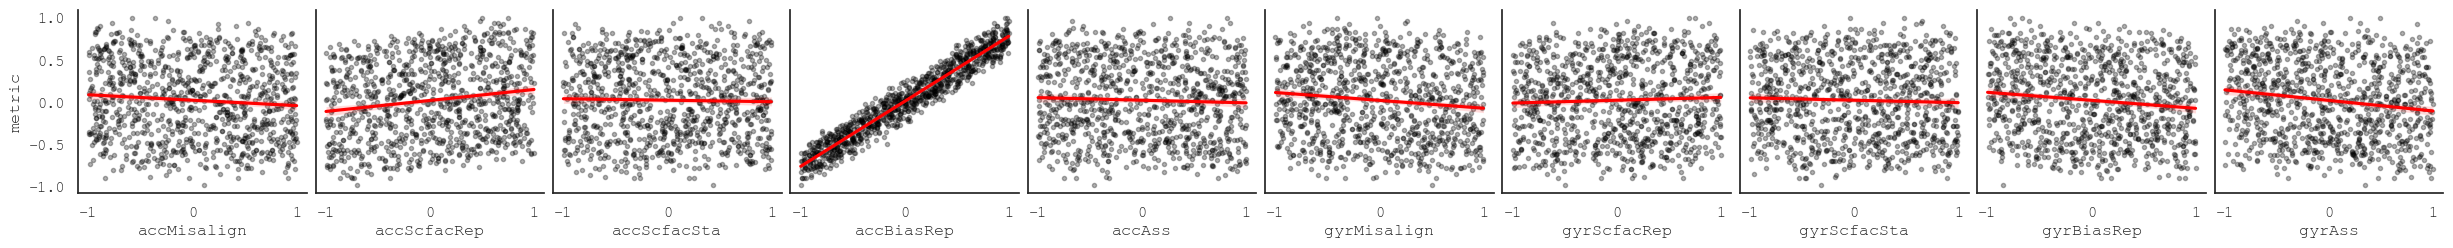

In [33]:
sns.pairplot(data=df_4, x_vars=parameter_names, y_vars=["metric"], markers=".", diag_kind="kde", kind='reg',
             plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.3, 'color': 'black'}})

In [34]:
for p in parameter_names:
    correlate_variables(df_4, p, 'metric', 0.3)

Correlation between accBiasRep and metric is : 0.966


# Stage Correlations

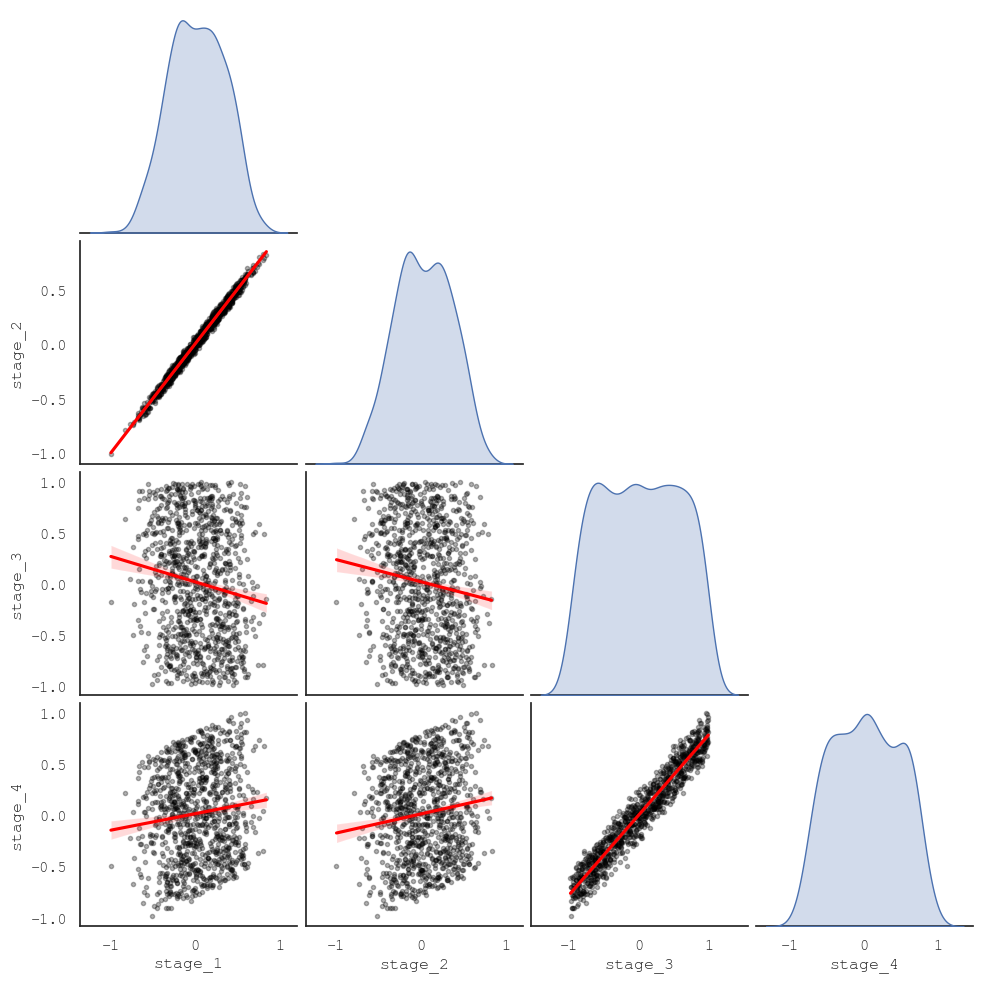

In [35]:
df_metric = pd.DataFrame({'stage_1': df_1['metric'], 'stage_2': df_2['metric'], 'stage_3': df_3['metric'], 'stage_4': df_4['metric'] })
sns.pairplot(data=df_metric, markers=".", diag_kind="kde", kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.3, 'color': 'black'}}, corner=True)

<Axes: >

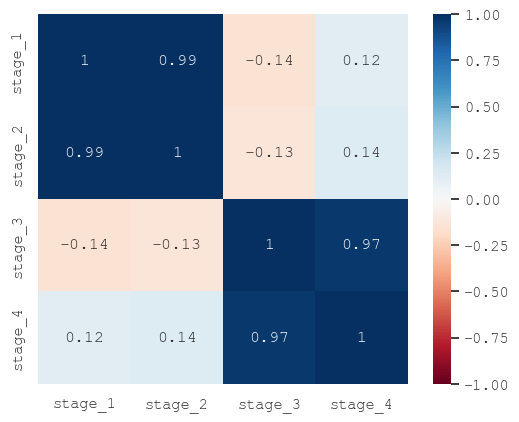

In [36]:
sns.heatmap(df_metric[['stage_1', 'stage_2', 'stage_3', 'stage_4']].corr(), annot=True,square=True, cmap='RdBu', vmax=1, vmin=-1)

# Distributions

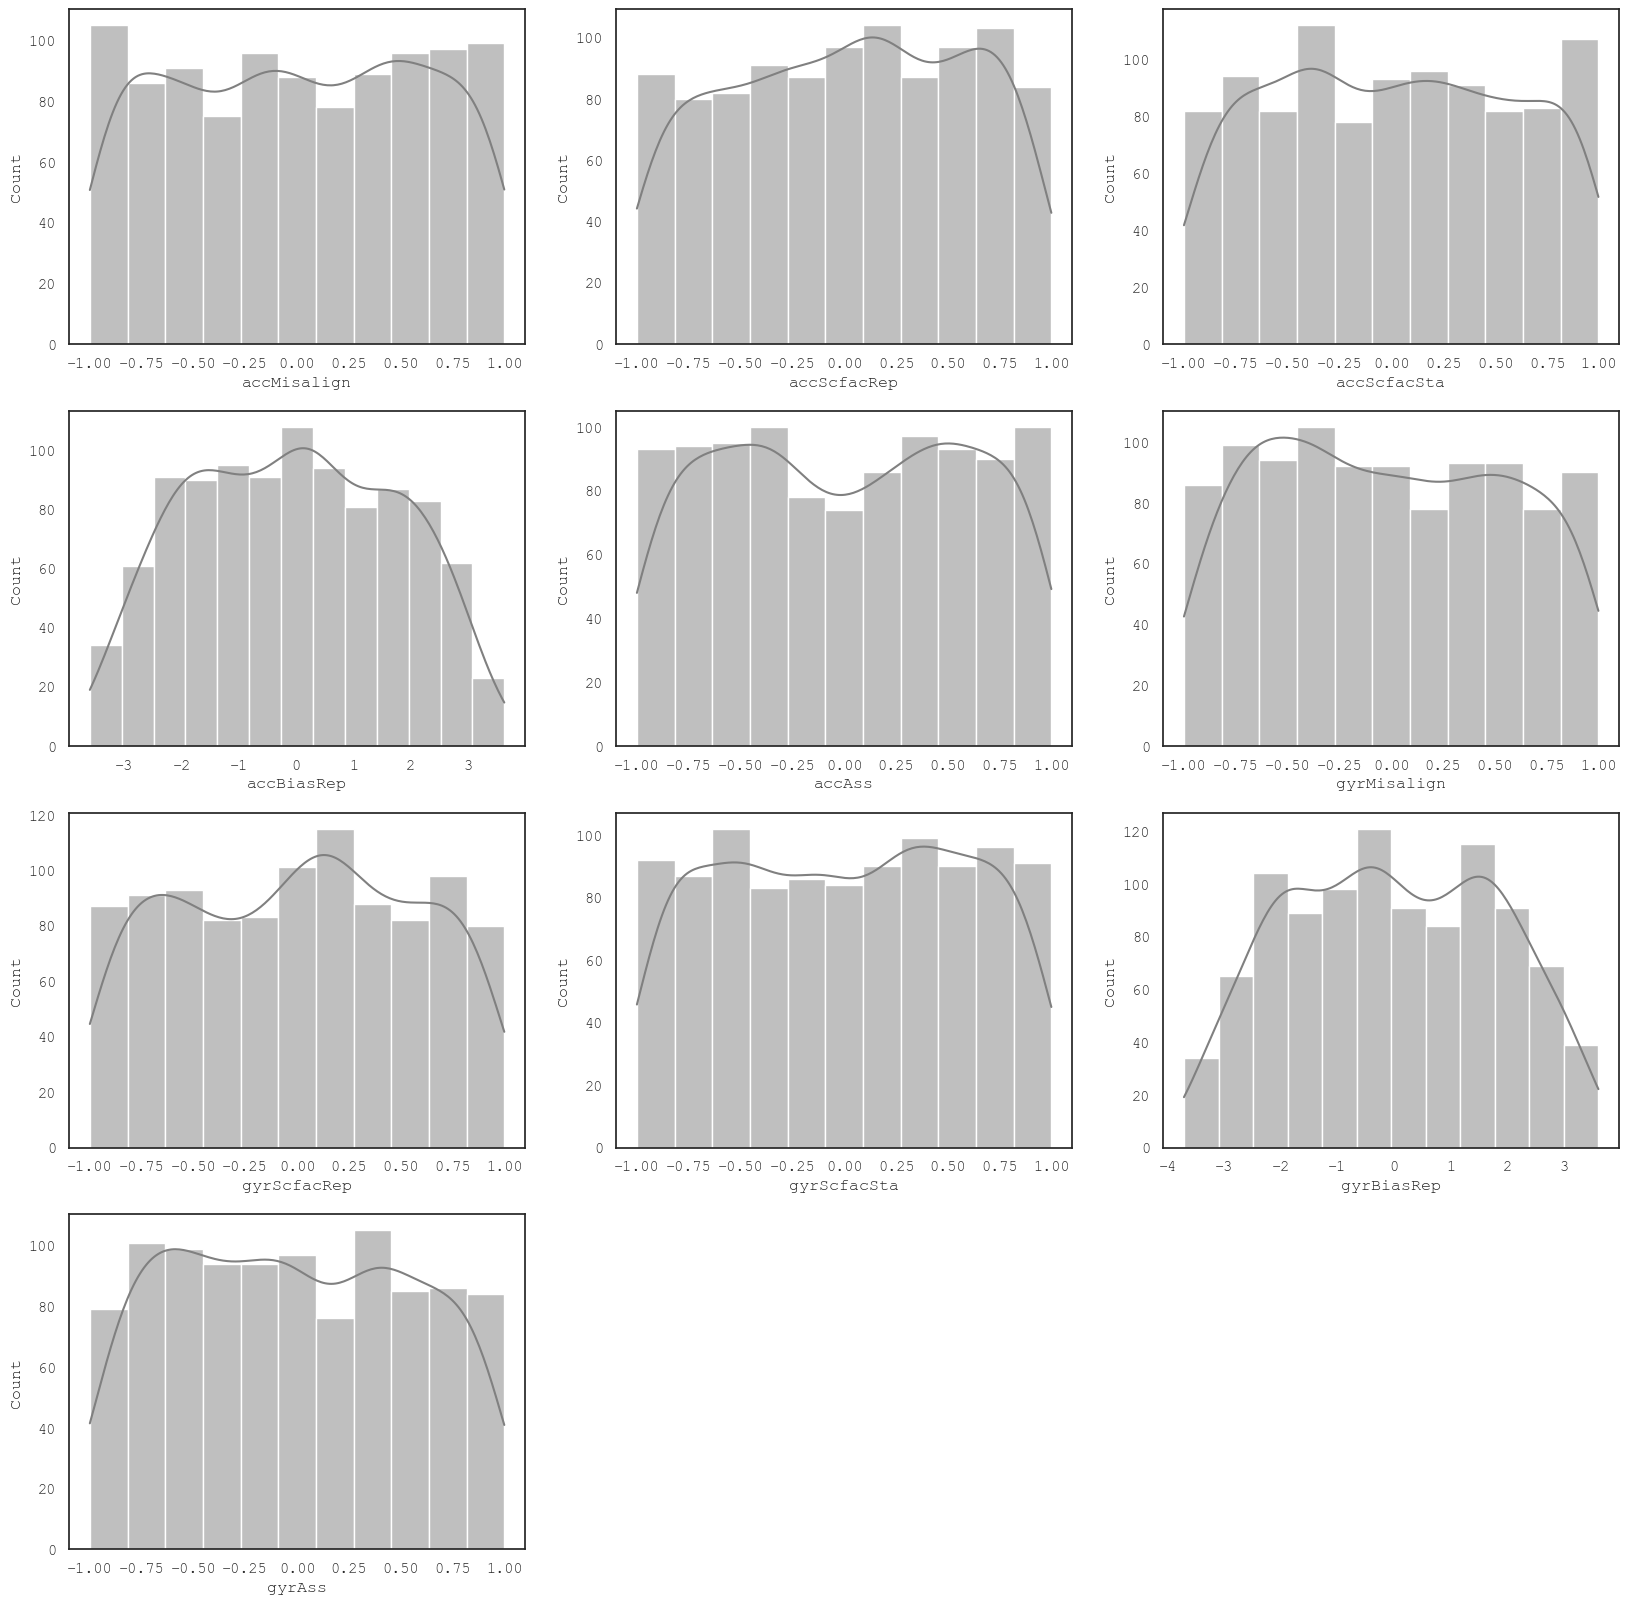

In [37]:
fig, ax = plt.subplots(4,3,figsize=(20,20))
# sns.displot(df_1['param_4'], kind='kde', ax=axes[0])
sns.histplot(df_1["accMisalign"], ax=ax[0][0], kde=True, color='gray')
sns.histplot(df_1["accScfacRep"], ax=ax[0][1], kde=True, color='gray')
sns.histplot(df_1["accScfacSta"], ax=ax[0][2], kde=True, color='gray')
sns.histplot(df_1["accBiasRep"], ax=ax[1][0], kde=True, color='gray')
sns.histplot(df_1["accAss"], ax=ax[1][1], kde=True, color='gray')
sns.histplot(df_1["gyrMisalign"], ax=ax[1][2], kde=True, color='gray')
sns.histplot(df_1["gyrScfacRep"], ax=ax[2][0], kde=True, color='gray')
sns.histplot(df_1["gyrScfacSta"], ax=ax[2][1], kde=True, color='gray')
sns.histplot(df_1["gyrBiasRep"], ax=ax[2][2], kde=True, color='gray')
sns.histplot(df_1["gyrAss"], ax=ax[3][0], kde=True, color='gray')
fig.delaxes(ax[3][1])
fig.delaxes(ax[3][2])


# Model Experiments

### 1st Stage

Mean: 0.023; Absolute: 0.275
Standart Deviation: 0.33

Training + Validation: 800; Test: 200
Training: 640; Validation: 160; Batch: 80

Baseline MAE: 0.276
Baseline MAPE: 1.0
Baseline MSE: 0.112
Baseline RMSE: 0.335

K: 20
Average MAE: 0.044
Average MAPE: 2.342
Average MSE: 0.003
Average RMSE: 0.055


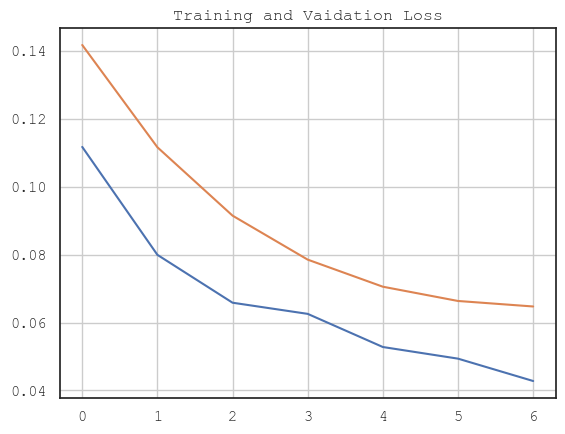

In [38]:
# train and test the model
label_name="metric"
# train_test_report(df_1, parameter_names , label_name, loss_draw=True, shuffle=True, hidden_s=(50,70,30), al=0.01, batch_size=80)
train_test_report(df_1, parameter_names , label_name, loss_draw=True, hidden_s=(50,70,50), al=0.01, batch_size=80, is_verbose=True, full_report=False)
train_test_report_baseline(df_1, parameter_names , label_name)
train_test_report_k_times(df_1, parameter_names , label_name, hidden_s=(50,70,50), al=0.01, batch_size=80, k=20)

### 2nd Stage

Mean: 0.032; Absolute: 0.278
Standart Deviation: 0.332

Training + Validation: 800; Test: 200
Training: 640; Validation: 160; Batch: 80

Baseline MAE: 0.281
Baseline MAPE: 1.0
Baseline MSE: 0.115
Baseline RMSE: 0.338

K: 20
Average MAE: 0.04
Average MAPE: 0.899
Average MSE: 0.003
Average RMSE: 0.051


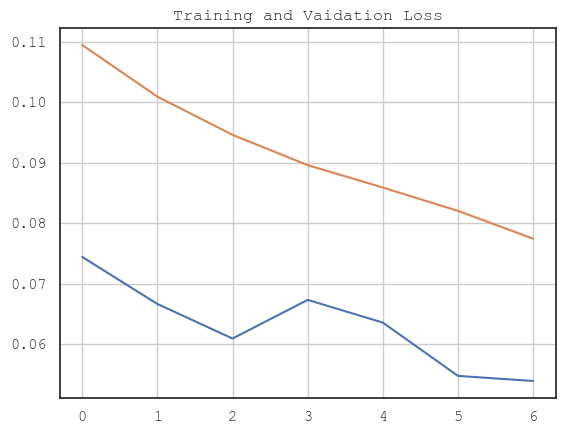

In [39]:
# train and test the model
label_name="metric"
train_test_report(df_2, parameter_names , label_name, loss_draw=True, hidden_s=(50,70,50), al=0.01, batch_size=80, is_verbose=True, full_report=False)
train_test_report_baseline(df_2, parameter_names , label_name)
train_test_report_k_times(df_2, parameter_names , label_name, hidden_s=(50,70,50), al=0.01, batch_size=80, k=20)

### 3rd Stage

Mean: 0.018; Absolute: 0.49
Standart Deviation: 0.567

Training + Validation: 800; Test: 200
Training: 640; Validation: 160; Batch: 80

Baseline MAE: 0.469
Baseline MAPE: 1.0
Baseline MSE: 0.303
Baseline RMSE: 0.55

K: 20
Average MAE: 0.05
Average MAPE: 0.566
Average MSE: 0.004
Average RMSE: 0.063


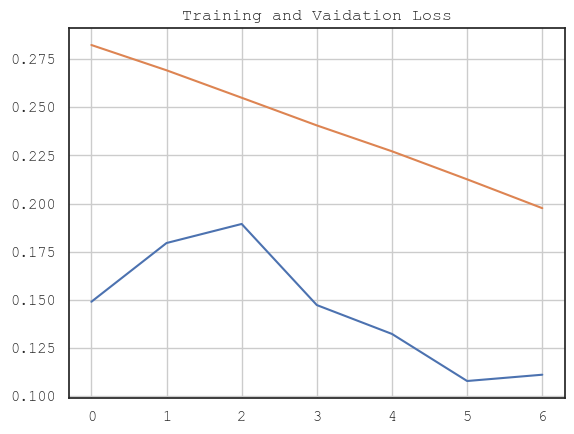

In [40]:
# train and test the model
label_name="metric"
train_test_report(df_3, parameter_names , label_name, loss_draw=True, hidden_s=(50,70,50), al=0.01, batch_size=80, is_verbose=True, full_report=False)
train_test_report_baseline(df_3, parameter_names , label_name)
train_test_report_k_times(df_3, parameter_names , label_name, hidden_s=(50,70,50), al=0.01, batch_size=80, k=20)

Mean: 0.018; Absolute: 0.49
Standart Deviation: 0.567

Training + Validation: 800; Test: 200
Training: 640; Validation: 160; Batch: 80

Baseline MAE: 0.469
Baseline MAPE: 1.0
Baseline MSE: 0.303
Baseline RMSE: 0.55

K: 20
Average MAE: 0.596
Average MAPE: 4.314
Average MSE: 0.535
Average RMSE: 0.731


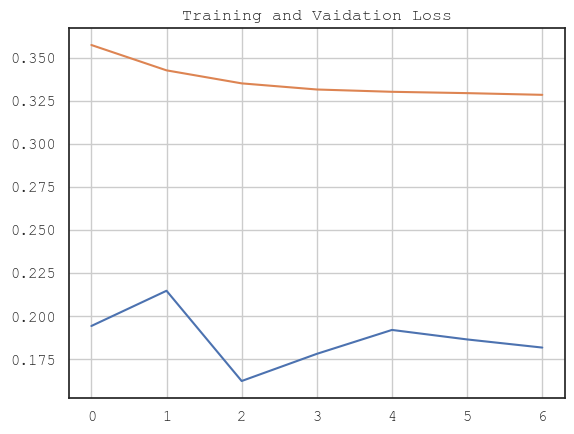

In [41]:
# without parameter_4
# parameter_names_cut = ["param_1", "param_2", "param_3", "param_5", "param_6", "param_7", "param_8", "param_9", "param_10"]
parameter_names_cut = ["accMisalign", "accScfacRep", "accScfacSta", "accAss", "gyrMisalign", "gyrScfacRep", "gyrScfacSta", "gyrBiasRep", "gyrAss"]
train_test_report(df_3, parameter_names_cut , label_name, loss_draw=True, hidden_s=(50,70,50), al=0.01, batch_size=80, is_verbose=True, full_report=False)
train_test_report_baseline(df_3, parameter_names_cut , label_name)
train_test_report_k_times(df_3, parameter_names_cut , label_name, hidden_s=(50,70,50), al=0.01, batch_size=80, k=20)

### 4th Stage

Mean: 0.025; Absolute: 0.389
Standart Deviation: 0.457

Training + Validation: 800; Test: 200
Training: 640; Validation: 160; Batch: 80

Baseline MAE: 0.378
Baseline MAPE: 1.0
Baseline MSE: 0.204
Baseline RMSE: 0.451

K: 20
Average MAE: 0.045
Average MAPE: 0.387
Average MSE: 0.003
Average RMSE: 0.057


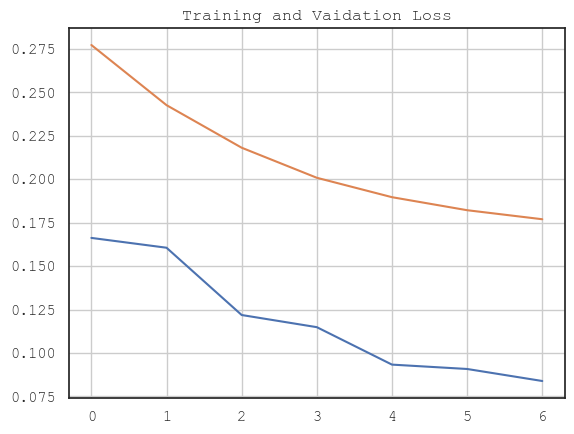

In [42]:
# train and test the model
label_name="metric"
train_test_report(df_4, parameter_names , label_name, loss_draw=True, hidden_s=(50,70,50), al=0.01, batch_size=80, is_verbose=True, full_report=False)
train_test_report_baseline(df_4, parameter_names , label_name)
train_test_report_k_times(df_4, parameter_names , label_name, hidden_s=(50,70,50), al=0.01, batch_size=80, k=20)

Mean: 0.025; Absolute: 0.389
Standart Deviation: 0.457

Training + Validation: 800; Test: 200
Training: 640; Validation: 160; Batch: 80

Baseline MAE: 0.378
Baseline MAPE: 1.0
Baseline MSE: 0.204
Baseline RMSE: 0.451

K: 20
Average MAE: 0.476
Average MAPE: 3.533
Average MSE: 0.342
Average RMSE: 0.585


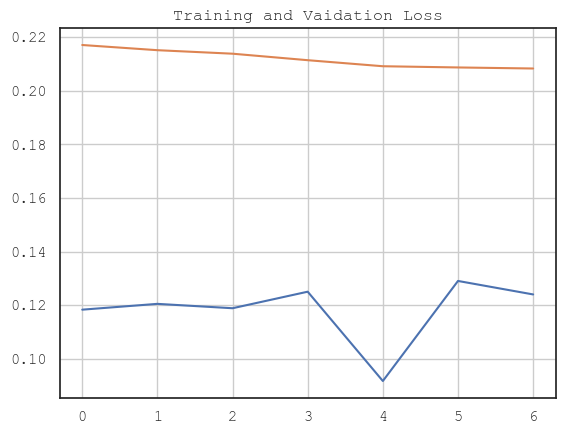

In [66]:
# without parameter_4
parameter_names_cut = ["accMisalign", "accScfacRep", "accScfacSta", "accAss", "gyrMisalign", "gyrScfacRep", "gyrScfacSta", "gyrBiasRep", "gyrAss"]
train_test_report(df_4, parameter_names_cut , label_name, loss_draw=True, hidden_s=(50,70,50), al=0.01, batch_size=80, is_verbose=True, full_report=False)
train_test_report_baseline(df_4, parameter_names_cut , label_name)
train_test_report_k_times(df_4, parameter_names_cut , label_name, hidden_s=(50,70,50), al=0.01, batch_size=80, k=20)

# Feature Importance (Singular)

### 1st Stage

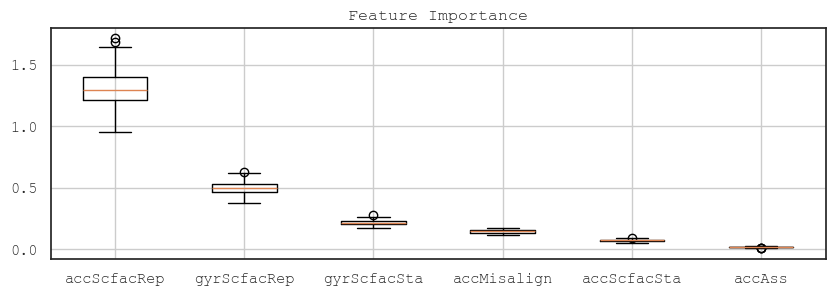

In [43]:
r = train_test_report(df_1, parameter_names , label_name, loss_draw=False, hidden_s=(50,70,50), al=0.01, batch_size=80, is_verbose=False, full_report=True, return_fi=True )
param_names = []
mean_values = []
std_values = []

for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0 and r.importances_mean[i] > 0.01:
        param_names.append(parameter_names[i])
        mean_values.append(r.importances_mean[i])
        std_values.append(r.importances_std[i])
        '''
        print(f"{parameter_names[i]:<10}"
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")
        '''
        
fig, ax = plt.subplots(figsize=(10, 3))
bp = ax.boxplot([np.random.normal(mean, std, 200) for mean, std in zip(mean_values, std_values)])

ax.set_xticklabels(param_names)
# ax.set_ylabel('Values')
ax.set_title('Feature Importance')
ax.grid(True)

plt.show()


In [44]:
'''
X = df_1[parameter_names]
y = df_1['metric']
corr_coeffs, _ = f_regression(X, y)
# R = corr_coeffs.mean()
# print(f"Coefficient of Multiple Correlation (R): {R:.4f}")
for i in range(len(parameter_names)):
    print(parameter_names[i], corr_coeffs[i])
'''

'\nX = df_1[parameter_names]\ny = df_1[\'metric\']\ncorr_coeffs, _ = f_regression(X, y)\n# R = corr_coeffs.mean()\n# print(f"Coefficient of Multiple Correlation (R): {R:.4f}")\nfor i in range(len(parameter_names)):\n    print(parameter_names[i], corr_coeffs[i])\n'

### 2nd Stage

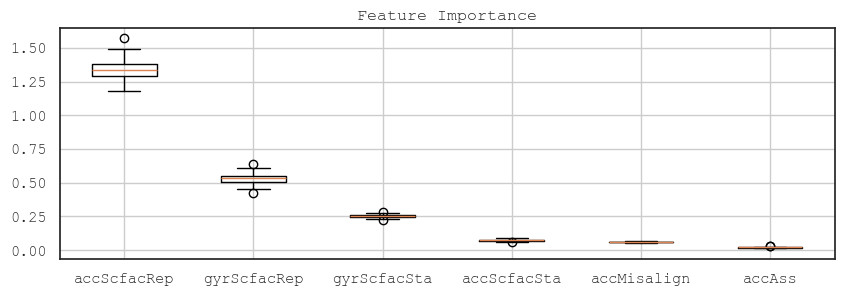

In [45]:
r = train_test_report(df_2, parameter_names , label_name, loss_draw=False, hidden_s=(50,70,50), al=0.01, batch_size=80, is_verbose=False, full_report=True, return_fi=True )
param_names = []
mean_values = []
std_values = []

for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0 and r.importances_mean[i] > 0.01:
        param_names.append(parameter_names[i])
        mean_values.append(r.importances_mean[i])
        std_values.append(r.importances_std[i])
        '''
        print(f"{parameter_names[i]:<10}"
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")
        '''
        
fig, ax = plt.subplots(figsize=(10, 3))
bp = ax.boxplot([np.random.normal(mean, std, 200) for mean, std in zip(mean_values, std_values)])

ax.set_xticklabels(param_names)
# ax.set_ylabel('Values')
ax.set_title('Feature Importance')
ax.grid(True)

plt.show()


### 3rd Stage

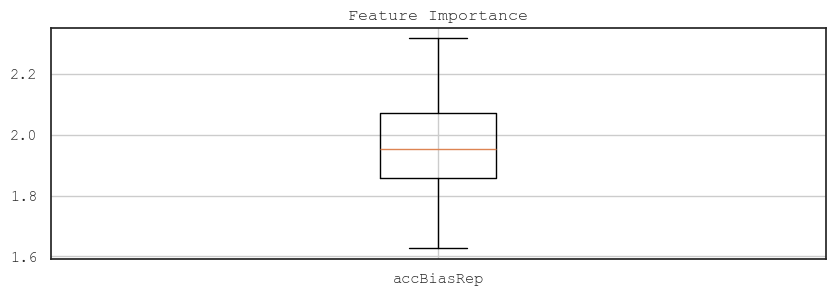

In [46]:
r = train_test_report(df_3, parameter_names , label_name, loss_draw=False, hidden_s=(50,70,50), al=0.01, batch_size=80, is_verbose=False, full_report=True, return_fi=True )
param_names = []
mean_values = []
std_values = []

for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0 and r.importances_mean[i] > 0.01:
        param_names.append(parameter_names[i])
        mean_values.append(r.importances_mean[i])
        std_values.append(r.importances_std[i])
        '''
        print(f"{parameter_names[i]:<10}"
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")
        '''
        
fig, ax = plt.subplots(figsize=(10, 3))
bp = ax.boxplot([np.random.normal(mean, std, 200) for mean, std in zip(mean_values, std_values)])

ax.set_xticklabels(param_names)
# ax.set_ylabel('Values')
ax.set_title('Feature Importance')
ax.grid(True)

plt.show()


### 4th Stage

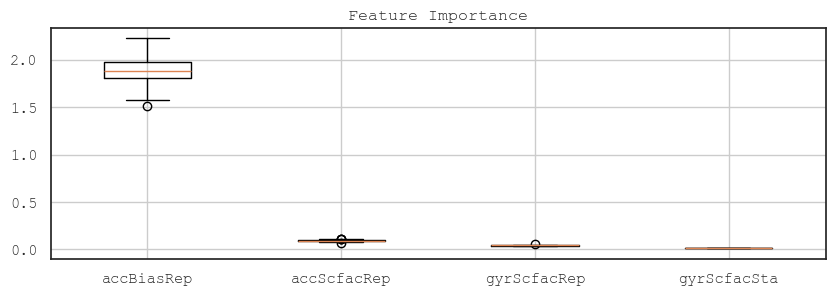

In [47]:
r = train_test_report(df_4, parameter_names , label_name, loss_draw=False, hidden_s=(50,70,50), al=0.01, batch_size=80, is_verbose=False, full_report=True, return_fi=True )
param_names = []
mean_values = []
std_values = []

for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0 and r.importances_mean[i] > 0.01:
        param_names.append(parameter_names[i])
        mean_values.append(r.importances_mean[i])
        std_values.append(r.importances_std[i])
        '''
        print(f"{parameter_names[i]:<10}"
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")
        '''
        
fig, ax = plt.subplots(figsize=(10, 3))
bp = ax.boxplot([np.random.normal(mean, std, 200) for mean, std in zip(mean_values, std_values)])

ax.set_xticklabels(param_names)
# ax.set_ylabel('Values')
ax.set_title('Feature Importance')
ax.grid(True)

plt.show()


# Combination of Parameters

## Regression

In [48]:
# generate 2s combination of parameters
param_comb_list = list()

# 2nd power of existing parameters
for p in parameter_names:
    # param_comb_list.append(p)
    param_comb_list.append(p + " & " + p)

# combinations of 2-parameters
# PS: no need to generate all combinations of parameters since results are not good for 2s combination
for n in range(1,2,1):
    for param_subset in itertools.combinations(parameter_names, n+1):
        param_comb_list.append(param_subset[0] + " & " + param_subset[1])
        
'''
# combinations of 3-parameters
for n in range(2,3,1):
    for param_subset in itertools.combinations(parameter_names, n+1):
        param_comb_list.append(param_subset[0] + " & " + param_subset[1] + " & " + param_subset[2])
'''

'\n# combinations of 3-parameters\nfor n in range(2,3,1):\n    for param_subset in itertools.combinations(parameter_names, n+1):\n        param_comb_list.append(param_subset[0] + " & " + param_subset[1] + " & " + param_subset[2])\n'

### 1st Stage

In [49]:
df_tmp = df_1.copy(deep=True)
for s in param_comb_list:
    combined_params = s.split(" & ")
    df_tmp[s] = df_tmp[combined_params[0]] * df_tmp[combined_params[1]]
df_tmp.head()

,accMisalign,accScfacRep,accScfacSta,accBiasRep,accAss,gyrMisalign,gyrScfacRep,gyrScfacSta,gyrBiasRep,gyrAss,...,gyrMisalign & gyrScfacRep,gyrMisalign & gyrScfacSta,gyrMisalign & gyrBiasRep,gyrMisalign & gyrAss,gyrScfacRep & gyrScfacSta,gyrScfacRep & gyrBiasRep,gyrScfacRep & gyrAss,gyrScfacSta & gyrBiasRep,gyrScfacSta & gyrAss,gyrBiasRep & gyrAss
0,-0.527540,-0.95620,-0.78962,-0.82610,-0.73765,0.86489,0.24800,-0.15286,2.04870,-0.439050,...,0.214493,-0.132207,1.771900,-0.379730,-0.037909,0.508078,-0.108884,-0.313164,0.067113,-0.899482
1,-0.036688,-0.86744,0.20426,0.17013,-0.32272,-0.51676,0.63569,-0.46363,0.41174,0.984210,...,-0.328499,0.239585,-0.212771,-0.508600,-0.294725,0.261739,0.625652,-0.190895,-0.456309,0.405239
2,0.737850,-0.63804,-0.27439,1.75240,-0.12401,-0.39396,0.38597,-0.99378,1.39020,-0.511290,...,-0.152057,0.391510,-0.547683,0.201428,-0.383569,0.536575,-0.197343,-1.381553,0.508110,-0.710795
3,-0.762480,0.17849,-0.43865,2.17160,-0.30334,-0.98921,-0.64112,0.87838,-0.12913,0.792370,...,0.634202,-0.868902,0.127737,-0.783820,-0.563147,0.082788,-0.508004,-0.113425,0.696002,-0.102319
4,-0.398580,0.93725,0.73720,0.65782,-0.71170,-0.54900,0.21838,0.47238,2.19550,0.088211,...,-0.119891,-0.259337,-1.205330,-0.048428,0.103158,0.479453,0.019264,1.037110,0.041669,0.193667


In [50]:
# fit regression model
X, y = df_tmp[parameter_names + param_comb_list], df_tmp['metric']
model = LinearRegression()
model.fit(X, y)
# display coefficients that indicate importance
coefficients_df = pd.DataFrame(zip(X.columns, model.coef_), columns=['Variable', 'Coefficient'])
coefficients_df['Coefficient'] = coefficients_df['Coefficient'].map(lambda x: abs(round(x, 5)))
coefficients_df.sort_values(by=['Coefficient'], ascending=False).reset_index(drop=True).head(10)

,Variable,Coefficient
0,accScfacRep,0.48543
1,gyrScfacRep,0.30243
2,gyrScfacSta,0.20161
3,accMisalign,0.15898
4,accScfacSta,0.12136
5,accAss,0.06080
6,gyrAss,0.01263
7,gyrMisalign,0.00265
8,accScfacRep & gyrScfacRep,0.00059
9,accScfacRep & gyrScfacSta,0.00039


### 2nd Stage

In [52]:
df_tmp = df_2.copy(deep=True)
for s in param_comb_list:
    combined_params = s.split(" & ")
    df_tmp[s] = df_tmp[combined_params[0]] * df_tmp[combined_params[1]]

# fit regression model
X, y = df_tmp[parameter_names + param_comb_list], df_tmp['metric']
model = LinearRegression()
model.fit(X, y)
# display coefficients that indicate importance
coefficients_df = pd.DataFrame(zip(X.columns, model.coef_), columns=['Variable', 'Coefficient'])
coefficients_df['Coefficient'] = coefficients_df['Coefficient'].map(lambda x: abs(round(x, 5)))
coefficients_df.sort_values(by=['Coefficient'], ascending=False).reset_index(drop=True).head(10)

,Variable,Coefficient
0,accScfacRep,0.48147
1,gyrScfacRep,0.32360
2,gyrScfacSta,0.21562
3,accScfacSta,0.12055
4,accMisalign,0.10234
5,accAss,0.06031
6,gyrAss,0.01344
7,gyrMisalign,0.00464
8,accBiasRep,0.00359
9,gyrBiasRep,0.00253


### 3rd Stage

In [53]:
df_tmp = df_3.copy(deep=True)
for s in param_comb_list:
    combined_params = s.split(" & ")
    df_tmp[s] = df_tmp[combined_params[0]] * df_tmp[combined_params[1]]

# fit regression model
X, y = df_tmp[parameter_names + param_comb_list], df_tmp['metric']
model = LinearRegression()
model.fit(X, y)
# display coefficients that indicate importance
coefficients_df = pd.DataFrame(zip(X.columns, model.coef_), columns=['Variable', 'Coefficient'])
coefficients_df['Coefficient'] = coefficients_df['Coefficient'].map(lambda x: abs(round(x, 5)))
coefficients_df.sort_values(by=['Coefficient'], ascending=False).reset_index(drop=True).head(10)

,Variable,Coefficient
0,accBiasRep,0.99083
1,accBiasRep & accBiasRep,0.00785
2,accScfacRep & accBiasRep,0.00255
3,accBiasRep & gyrBiasRep,0.00169
4,accMisalign & accBiasRep,0.00089
5,accBiasRep & gyrScfacRep,0.00072
6,accScfacSta & accBiasRep,0.00064
7,accBiasRep & gyrScfacSta,0.00048
8,gyrScfacRep,0.00035
9,accBiasRep & accAss,0.00032


### 4th Stage

In [54]:
df_tmp = df_4.copy(deep=True)
for s in param_comb_list:
    combined_params = s.split(" & ")
    df_tmp[s] = df_tmp[combined_params[0]] * df_tmp[combined_params[1]]

# fit regression model
X, y = df_tmp[parameter_names + param_comb_list], df_tmp['metric']
model = LinearRegression()
model.fit(X, y)
# display coefficients that indicate importance
coefficients_df = pd.DataFrame(zip(X.columns, model.coef_), columns=['Variable', 'Coefficient'])
coefficients_df['Coefficient'] = coefficients_df['Coefficient'].map(lambda x: abs(round(x, 5)))
coefficients_df.sort_values(by=['Coefficient'], ascending=False).reset_index(drop=True).head(10)

,Variable,Coefficient
0,accBiasRep,0.79970
1,accScfacRep,0.18128
2,gyrScfacRep,0.10925
3,gyrScfacSta,0.07283
4,accScfacSta,0.04532
5,accMisalign,0.03654
6,accAss,0.02268
7,accBiasRep & accBiasRep,0.00668
8,gyrBiasRep,0.00545
9,gyrAss,0.00455


## NN Model

In [57]:
# generate n-combination of parameters
param_comb_dict = dict()
for n in range(len(parameter_names)):
    for param_subset in itertools.combinations(parameter_names, n+1):
        param_comb_dict[param_subset] = 999

ref_dict = {"param_1": "accMisalign", "param_2": "accScfacRep", "param_3": "accScfacSta", "param_4": "accBiasRep", "param_5": "accAss", 
            "param_6": "gyrMisalign", "param_7": "gyrScfacRep", "param_8": "gyrScfacSta", "param_9": "gyrBiasRep", "param_10": "gyrAss"}

### 1st Stage

In [ ]:
n = 0
i = 0
per_list = [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
for k in param_comb_dict:
    perc = 100*(float(n+1)/len(param_comb_dict))
    if perc >= per_list[i]:
        print("%%%.2f..." % perc)
        i += 1
    param_list = list(k)
    param_comb_dict[k] = train_test_report_k_times(df_1, param_list , label_name, hidden_s=(50,70,50), al=0.01, batch_size=80, k=5, is_verbose=False, return_err=True)[0]
    n += 1

In [ ]:
# show MAE values in order, resulting from combination of parameters
dict(sorted(param_comb_dict.items(), key=lambda item: item[1]))

### 2nd Stage

In [ ]:
n = 0
i = 0
for k in param_comb_dict:
    perc = 100*(float(n+1)/len(param_comb_dict))
    if perc >= per_list[i]:
        print("%%%.2f..." % perc)
        i += 1
    param_list = list(k)
    param_comb_dict[k] = train_test_report_k_times(df_2, param_list , label_name, hidden_s=(50,70,50), al=0.01, batch_size=80, k=5, is_verbose=False, return_err=True)[0]
    n += 1

In [ ]:
# show MAE values in order, resulting from combination of parameters
dict(sorted(param_comb_dict.items(), key=lambda item: item[1]))

### 3rd Stage

In [ ]:
n = 0
i = 0
for k in param_comb_dict:
    perc = 100*(float(n+1)/len(param_comb_dict))
    if perc >= per_list[i]:
        print("%%%.2f..." % perc)
        i += 1
    param_list = list(k)
    param_comb_dict[k] = train_test_report_k_times(df_3, param_list , label_name, hidden_s=(50,70,50), al=0.01, batch_size=80, k=5, is_verbose=False, return_err=True)[0]
    n += 1

In [ ]:
# show MAE values in order, resulting from combination of parameters
dict(sorted(param_comb_dict.items(), key=lambda item: item[1]))

### 4th Stage

In [ ]:
n = 0
i = 0
for k in param_comb_dict:
    perc = 100*(float(n+1)/len(param_comb_dict))
    if perc >= per_list[i]:
        print("%%%.2f..." % perc)
        i += 1
    param_list = list(k)
    param_comb_dict[k] = train_test_report_k_times(df_4, param_list , label_name, hidden_s=(50,70,50), al=0.01, batch_size=80, k=5, is_verbose=False, return_err=True)[0]
    n += 1

In [ ]:
# show MAE values in order, resulting from combination of parameters
dict(sorted(param_comb_dict.items(), key=lambda item: item[1]))

---

---